In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats, integrate
import warnings
warnings.filterwarnings('ignore')

## 독립동일분포
- 확률 변수가 서로 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않는다는 뜻이다.
- 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있다.
- 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다.
<br>

#### 독립성
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
- 2차원 확률변수 $(X,Y)$의 경우 다음과 같은 관계가 성립할 때 $X, Y$는 독립이라고 한다.
- 확률변수가 독립일 때 결합확률은 주변 확률의 곱으로 작성할 수 있다.
    $f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 일반화: $f_{X_1,X_2,\cdots,X_n}(x_1, x_2,$$\cdots$$,x_n) = f_{X_1}(x_1)f_{X_2}(x_2)$$\cdots$$f_{X_n}(x_n)$<br>

※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄.

#### 예시
1. 짝수와 홀수는 서로 독립이다.
2. 3보다 큰 정수와 홀수는 서로 독립이 아니다.

#### 독립성과 무상관성
- 공분산이나 상관계수가 0일 때 무상관이라 하고,<br>두 확률변수 사이에는 상관성, 즉 선형관계가 없음을 나타냄
- 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
    * 무상관성보다 독립성이 더 강한 개념
    * 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만,<br>
        X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아니다.<br>(= 공분산이나 상관계수만으로는 독립성을 검증하기 힘들다.)

In [25]:
# 불공정한 주사위 (130페이지)
# 선행함수 복붙 좀 하고

def E(XY, g):
    x_set, y_set, f_XY = XY # 결합함수와 확률변수의 분포
    return np.sum([g(x,y)*f_XY(x,y) for x in x_set for y in y_set])

def V(XY, g): # g는 변환식을 의미함
    x_set, y_set, f_XY = XY
    return np.sum([(g(x,y)-E(XY,g))**2 *f_XY(x,y)
                   for x in x_set for y in y_set])
def Cov(XY):
    x_set, y_set, f_XY = XY   
    mean_X = E(XY, lambda x,y:x)
    mean_Y = E(XY, lambda x,y: y)
    return np.sum([(x-mean_X)*(y-mean_Y) * f_XY(x,y)
                  for x in x_set for y in y_set])

def f_X(x):
    return np.sum([f_XY(x,y) for y in y_set]) # x 고정, y만 움직임

def f_Y(y):
    return np.sum([f_XY(x,y) for x in x_set]) # y 고정, x만 움직임
    
XY = [x_set, y_set, f_XY]

In [29]:
# 2차원 확률변수 X와 Y는 독립
# 공분산이 0이므로 무상관인 것을 알 수 있음
x_set = np.arange(1,7)
y_set = np.arange(1,7)
def f_XY(x,y):
    if x in x_set and y in y_set: # x는 2~12, y는 1~6. 주사위 2개의 눈금 범위
        return x*y/441 # 왜 441이냐 하면, 21*21이라서
                           # (y/21)*((x-y)/21)과 같은 모양새임
    else: return 0
XY = [x_set, y_set, f_XY]
Cov(XY)

-8.326672684688674e-17

In [22]:
# 무상관인 2개의 확률변수를 생각해 보자.
# 이것 역시 공분산이 0이라 무상관이다.
x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x,y):
    if (x,y) in [(0,0),(1,1),(1,-1)]:
        return 1/3
    else: return 0
XY = [x_set, y_set, f_XY]
Cov(XY)

0.0

In [23]:
# 독립성의 정의는 𝑓𝑋,𝑌(𝑥,𝑦)=𝑓𝑋(𝑥)𝑓𝑌(𝑦)이므로 독립성도 만족할까?
f_XY(0,0), f_X(0)*f_Y(0)
# 두 개가 다르니 둘이 독립적이진 않다. 걍 무상관일 뿐

(0.3333333333333333, 0.1111111111111111)

## 합의 분포
- 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,\cdots,X_n$의 합<br>$\displaystyle\sum_{i=1}^n X_i = X_1+X_2+\cdots+X_n$이 따르는 확률분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 나눈 표본평균의 분포도 쉽게 이해할 수 있음

<br>

#### 재생성(reproductive property)
    동일한 분포를 따르는 2개의 독립인 확률변수에 대해서 그 합도 동일한 확률분포가 되는 성질

In [35]:
# 정규분포의 합의 분포
# 서로 독립인 X~N(1,2), Y~N(2,3)이 있을 때
# 확률변수 X+Y~N(3,5)이다
# ~는 앞의 확률변수가 뒤의 확률분포를 따른다는 뜻임

rv1 = stats.norm(1,np.sqrt(2)) # norm 함수의 파라미터는 평균과 '표준편차'이니까~
rv2 = stats.norm(2,np.sqrt(3)) # 분산의 제곱근을 넣어줘야 하지

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample # 합의 표본
print(f'평균: {np.mean(X_sample).round(3)}, {np.mean(Y_sample).round(3)}')
print(f'분산: {np.var(X_sample).round(3)}, {np.var(Y_sample).round(3)}')
print(f'합의 평균, 분산: {np.mean(sum_sample).round(3)}, {np.var(sum_sample).round(3)}')

평균: 1.0, 2.002
분산: 2.005, 3.002
합의 평균, 분산: 3.002, 5.008


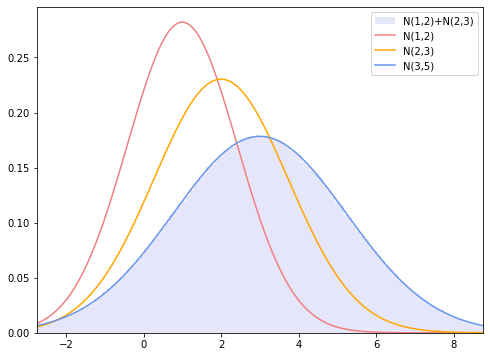

In [51]:
# 정규분포의 합의 분포 재생성 확인
plt.figure(figsize=(8,6))
rv3 = stats.norm(3,np.sqrt(5))
xrange = np.linspace(-3,9,200)

plt.hist(sum_sample, bins=200, density=True,
         color='lavender',label='N(1,2)+N(2,3)')

plt.plot(xrange, rv1.pdf(xrange), color='lightcoral',label='N(1,2)')
plt.plot(xrange, rv2.pdf(xrange), color='orange',label='N(2,3)')
plt.plot(xrange, rv3.pdf(xrange), color='cornflowerblue',label='N(3,5)')
plt.xlim(rv3.isf(0.995), rv3.isf(0.005))
plt.legend()
plt.show()

In [117]:
# 포아송 분포의 합의 분포
# 서로 독립인 X~Poi(3), Y~Poi(4)일 때
# 확률변수 X+Y도 Poi(7)을 따른다

rv1 = stats.poisson(3)
rv2 = stats.poisson(4)
rv3 = stats.poisson(7)

np.random.seed(0)
sample = int(1e6)
xsample = rv1.rvs(sample)
ysample = rv2.rvs(sample)
xysample = xsample+ysample
print(f'평균: {np.mean(xsample).round(3)}, {np.mean(ysample).round(3)}')
print(f'분산: {np.var(xsample,ddof=1).round(3)}, {np.var(ysample,ddof=1).round(3)}')
print(f'합의 평균, 분산: {np.mean(xysample).round(3)}, {np.var(xysample,ddof=1).round(3)}')

평균: 3.002, 3.999
분산: 2.995, 4.005
합의 평균, 분산: 7.001, 7.001


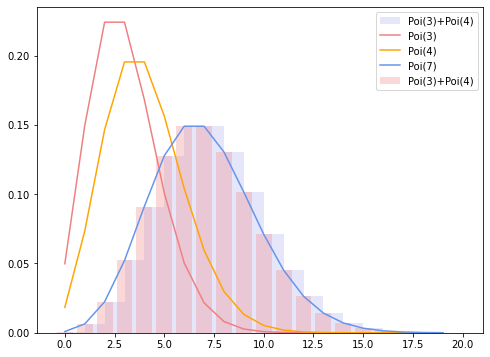

In [110]:
# 포아송 분포의 합의 분포 재생성 확인

plt.figure(figsize=(8,6))
xrange = np.arange(20)
hist,_ = np.histogram(xysample, bins=20,range=(0,20),density=True)
plt.hist(xysample,bins=20,range=(0,20),density=True, color='lavender',label='Poi(3)+Poi(4)')
plt.bar(xrange,hist, color='lightcoral',alpha=0.3,label='Poi(3)+Poi(4)')
plt.plot(xrange, rv1.pmf(xrange),color='lightcoral',label='Poi(3)')
plt.plot(xrange, rv2.pmf(xrange),color='orange',label='Poi(4)')
plt.plot(xrange, rv3.pmf(xrange),color='cornflowerblue',label='Poi(7)')

plt.legend()
plt.show()

# 히스토그램으로 그리면 x축을 1~2,3~4 이런식으로 구간 설정하고 그리기 때문에
# x값에 1,2,3... 등으로 들어가는 포아송 분포에서는 나눠서 바그래프로 그리는게 더 적절합니다.
# ax.hist로 직접 그려보시면 이해 가실거에요!
# 그려봤는데 그래프가 y축값이 안 맞더라구..?

#### 베르누이 합의 분포
- 베르누이 분포에는 재생성이 없다.
- 베르누이 분포의 합은 이항분포가 되는 성질이 있다.

In [100]:
# 베르누이 분포의 합의 분포
np.random.seed(0)
p = 0.3
rv = stats.bernoulli(p)
sample = rv.rvs((10, int(1e6))) # 표본크기 10으로 100만 번 표본 추출
sumsample = np.sum(sample, axis=0) # 행방향 더하기, 즉 같은 행 표본끼리 더하기
print(sample.shape, sumsample.shape)
print(f'평균: {np.mean(sample).round(3)}')
print(f'분산: {np.var(sample).round(3)}')
print(f'합의 평균, 분산: {np.mean(sumsample).round(3)}, {np.var(sumsample,ddof=1).round(3)}')

(10, 1000000) (1000000,)
평균: 0.3
분산: 0.21
합의 평균, 분산: 3.001, 2.101


In [93]:
print(f'표본 추출: {sample.shape}, 첫 번째 열: {sample[:,0]}')
print(f'성공 횟수: {sumsample}')

표본 추출: (10, 1000000), 첫 번째 열: [0 0 1 0 0 1 0 1 0 1]
성공 횟수: [4 5 4 ... 5 5 1]


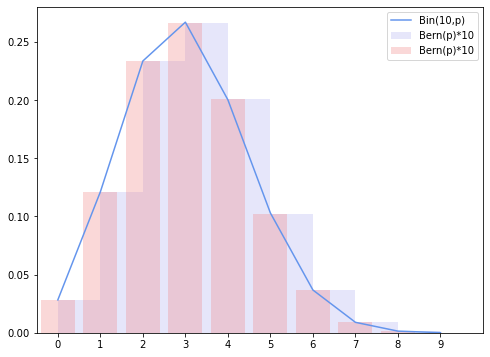

In [109]:
# 베르누이 분포의 합의 분포는 이항분포와 같다
# 표본 데이터가 하나이면 베르누이 분포, 여러 개이면 이항분포
# density 대신 normed를 쓰면 정규화되는 건데
# 전체 데이터 개수 중에 해당 구간의 값 개수가 차지하는 비율로 변환
# 근데 걍 density로 통일해서 쓰는 게 추후 오류도 안 나고 좋을 듯

plt.figure(figsize=(8,6))
rvb = stats.binom(10,p) # 성공확률 p인 베르누이 분포 10번 시행
xsize = np.arange(10)
plt.plot(xsize, rvb.pmf(xsize),color='cornflowerblue',label='Bin(10,p)')
plt.hist(sumsample, bins=10, range=(0,10),density=True,
         color='lavender',label='Bern(p)*10')

hist,_ = np.histogram(sumsample,bins=10,range=(0,10),density=True)
plt.bar(xsize,hist, color='lightcoral',alpha=0.3,label='Bern(p)*10')
plt.xlim(-0.5,10)
plt.xticks(np.arange(10))
plt.legend()
plt.show()

## 표본평균의 분포
- 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1+X_2+\cdots+X$의 표본평균이 따르는 분포
- 이 분포는 중심극한정리나 대수의 법칙 등 추측통계에서 중요한 성질을 담고 있기 때문에 유의해야 함<br>

$E(\bar X) = \mu$<br>
$V(\bar X) = \frac{\sigma^2}{n}$
<br>

#### 중심극한정리
- 확률변수 $X_1+X_2+\cdots+X$이 서로 독립이고 기댓값이 $\mu$, 분산이 $\sigma^2$인 확률분포를 따를 때,<br>$n$이 커짐에 따라 표본평균 $\bar X$의 분포는 정규분포 $N(\mu,\frac{\sigma^2}{n})$에 가까워진다.
- 원래 분포가 무엇이었든 표본평균의 분포는 표본의 개수가 늘어날수록 정규분포에 근접한다는 주장.
<br>

#### 대수의 법칙
- 확률변수 $X_1+X_2+\cdots+X$이 서로 독립이고 평균이 $\mu$, 분산이 $\sigma^2$일 것 같은 확률분포를 따를 때,<br>$n$이 커짐에 따라 표본평균은 $\mu$에 수렴한다.
- 표본 크기를 키우면 표본평균은 모평균에 수렴한다는 주장.

In [121]:
# 정규분포의 표본평균 분포
np.random.seed(0)
rv = stats.norm(1,np.sqrt(2))
n = 10 # 표본 10개
sample = rv.rvs((n,int(1e6))) # 10개 들이 표본 100만 세트. 행렬이기 때문에 () 개수 조심!
sammean = np.mean(sample, axis=0) # 같은 행끼리 더하기
print(f'표본평균의 평균: {np.mean(sammean)}')
print(f'표본평균의 분산: {np.var(sammean)}')

표본평균의 평균: 1.0004282273045204
표본평균의 분산: 0.19977058780535561


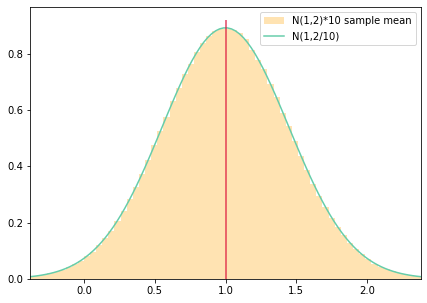

In [138]:
plt.figure(figsize=(7,5))
rv_bar = stats.norm(1,np.sqrt(2/n))
xrange = np.linspace(rv_bar.isf(0.999),rv_bar.isf(0.001),100)
plt.hist(sammean, bins=100, density=True, color='orange', alpha=0.3, label='N(1,2)*10 sample mean')
plt.plot(xrange, rv_bar.pdf(xrange),color='mediumaquamarine', label='N(1,2/10)')
plt.vlines(1, 0, 0.92, color='crimson',alpha=0.8)
plt.legend()
plt.xlim(rv_bar.isf(0.999),rv_bar.isf(0.001))
plt.show()

#### 합의 분포와 표본평균의 분포
- 포아송 분포나 정규분포 같은 재생성이 있는 일부 확률분포를 제외하면,<br>합의 분포가 어떤 형태를 보이는지 일반적으로 알 수 없다.
- 표본평균의 분포가 되면 재생성을 지닌 포아송 분포조차도 그 형태를 유지하지 않고 정규분포에 근사한 형태로 변화한다.
- 원래 분포가 무엇이었든 표본평균의 분포는 정규분포에 근사한다. 이를 '중심극한정리'라 한다.

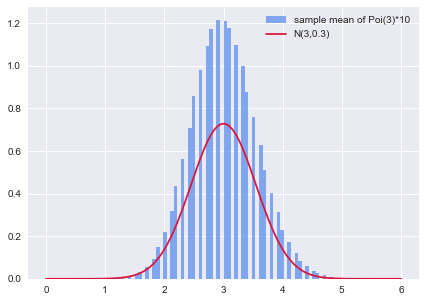

In [244]:
# [과제] 포아송 분포의 표본평균의 분포는 포아송 분포를 따르지 않고
# 정규분포에 근사한 형태가 된다.
# 좌우 비대칭이 아니라 좌우대칭형에 가깝다는 말. -> 중심극한정리
# 이를 시각화해서 증명해 보아라.
# 우선 표본평균과 표본분산이 둘 다 람다가 아닌 것으로 미루어보아
# 현재 이 분포는 포아송 분포를 따르지 않는다는 것을 알 수 있다.

rv = stats.poisson(3)
sample = rv.rvs((10, int(1e6))) # 평균을 내야 하니까 10개들이 100만 세트 추출
spmean = np.mean(sample, axis=0)
plt.figure(figsize=(7,5))
xrange = np.linspace(0, rv.isf(0.05), 100)
plt.hist(spmean, bins=100, density=True, range=(0, rv.isf(0.05)),
         color='cornflowerblue', alpha=0.8, label='sample mean of Poi(3)*10')
plt.plot(xrange, stats.norm(3,np.sqrt(3/10)).pdf(xrange),
         color='crimson', label='N(3,0.3)')
plt.legend()
plt.show()

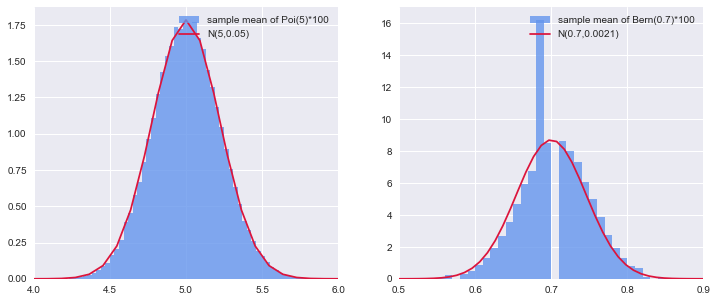

In [243]:
# [과제] 여러 분포 중 하나를 골라 중심극한정리를 입증하세요.
# 포아송 1개, 베르누이 1개씩 하자

np.random.seed(0)

# 포아송 람다 5
rvp = stats.poisson(5)
sam1 = rvp.rvs((100, 100000)) # n=100, 10만 세트 추출
spm1 = np.mean(sam1, axis=0)
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
xrange = np.linspace(0, rvp.isf(0.05), 100)
ax1.hist(spm1, bins=300, density=True,range=(0, rvp.isf(0.05)),
         color='cornflowerblue', alpha=0.8, label='sample mean of Poi(5)*100')
ax1.plot(xrange, stats.norm(5,np.sqrt(5/100)).pdf(xrange),
         color='crimson', label='N(5,0.05)')
ax1.set_xlim(4,6)
ax1.set_xticks(np.linspace(4,6,5))
ax1.legend()

# 베르누이 확률 p=0.7
# 기댓값 0.7, 분산 0.7*0.3
rvb = stats.bernoulli(0.7)
sam2 = rvb.rvs((100,100000))
spm2 = np.mean(sam2, axis=0)
xrange = np.linspace(0, rvb.isf(0.05), 100)
ax2.hist(spm2, bins=100, density=True, range=(0,rvb.isf(0.05)),
        color='cornflowerblue', alpha=0.8, label='sample mean of Bern(0.7)*100')
ax2.plot(xrange, stats.norm(0.7,np.sqrt(0.21*0.01)).pdf(xrange),
         color='crimson',label='N(0.7,0.0021)')
ax2.set_xlim(0.5,0.9)
ax2.set_xticks(np.linspace(0.5,0.9,5))
ax2.legend()
plt.show()


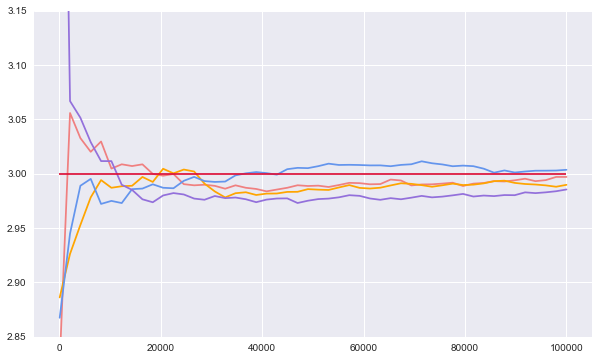

In [242]:
# [과제] 여러 분포 중 하나를 골라 대수의 법칙을 입증하세요.
# sample size의 변화에 따라 표본평균이 모평균에 수렴한다는 것을 증명.

plt.style.use('seaborn')
rv = stats.chi2(3)
sample = rv.rvs((100000,4))

color=['lightcoral','orange','cornflowerblue','mediumpurple']

plt.figure(figsize=(10,6))
size = np.linspace(100,100000,50).astype(int)
area = np.array([np.mean(sample[:i],axis=0) for i in size]).T

for i, color in zip(area, color):
    plt.plot(size, i, color=color)
plt.hlines(rv.mean(),0,100000,color='crimson')
plt.ylim(2.85,3.15)

plt.show()

# 표본의 크기가 커짐에 따라 표본평균은 모평균에 수렴한다 -> 대수의 법칙